# End to End multi-class Dog breed classification
### the data set being used is:
https://www.kaggle.com/competitions/dog-breed-identification/data

In [1]:
# unzip the data set
# !unzip "drive/MyDrive/dog-breed-images/archive.zip" -d "drive/MyDrive/dog_vision"

# Get the workspace ready

In [2]:
# --import tensorflow into colab--
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
print("tensorflow version:", tf.__version__)
print("tensorflow hub version:", hub.__version__)
print("gpu is", "avalible" if tf.config.list_physical_devices("GPU") else "not avalible")

tensorflow version: 2.18.0
tensorflow hub version: 0.16.1
gpu is avalible


## Getting the data ready (turning into tensor)

In [4]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/dog_vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

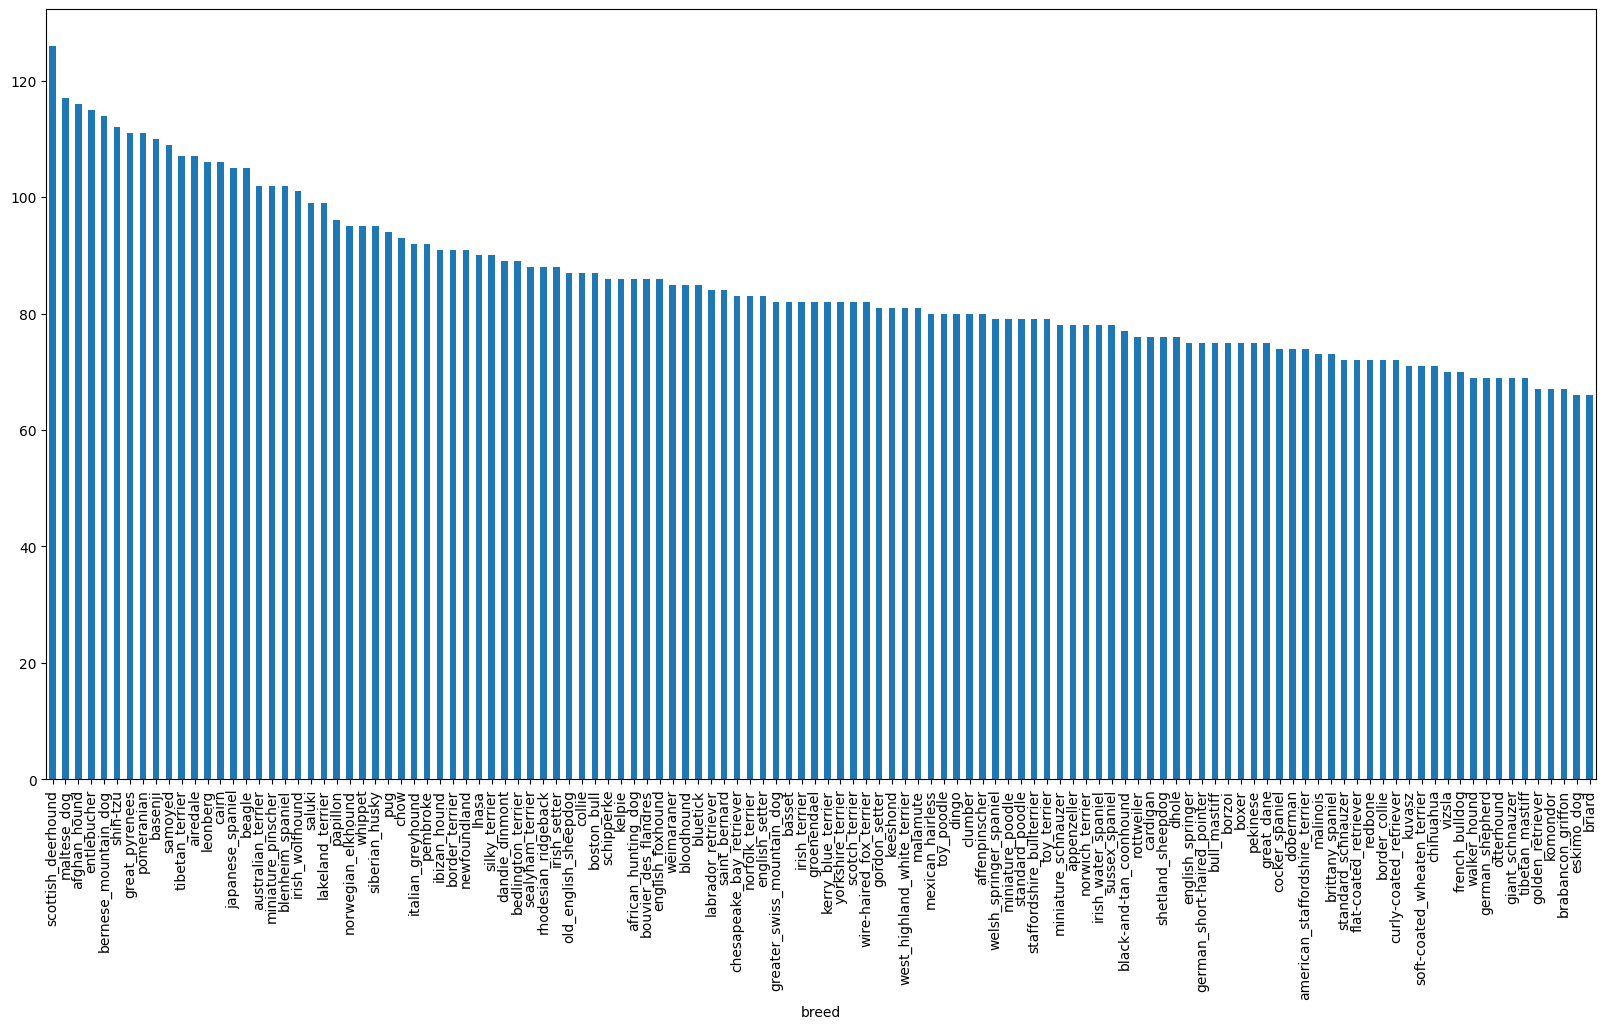

In [5]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [6]:
labels_csv['breed'].value_counts().median()

82.0

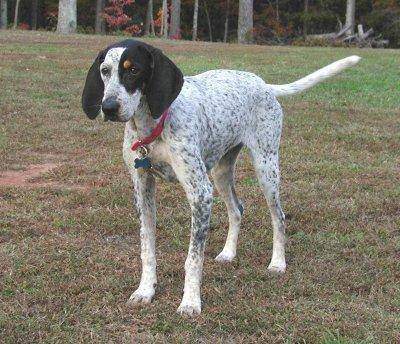

In [7]:
from IPython.display import Image
Image('drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

### Getting images and their labels

In [8]:
filenames = [f"drive/MyDrive/dog_vision/train/{fname}.jpg" for fname in labels_csv["id"]]
len(filenames)

10222

In [9]:
# check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/dog_vision/train/')) == len(filenames):
  print('your data is match with data source ✅')
else:
  print('your data is not match with data source check out and find the problem ❌')

your data is match with data source ✅


In [10]:
os.listdir('drive/MyDrive/dog_vision')

['labels.csv', 'sample_submission.csv', 'test', 'train']

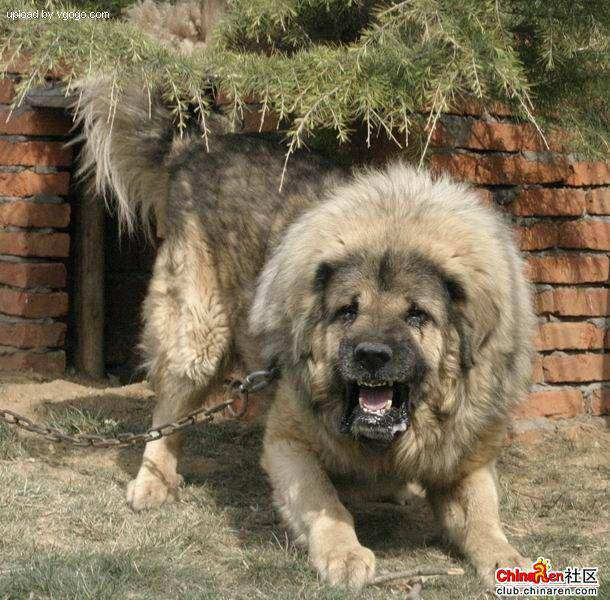

In [11]:
Image(filenames[9000])

In [12]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [13]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [14]:
import numpy as np

labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
print(labels)
print(len(labels))

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']
10222


In [15]:
# Ensure that the number of labels matches the number of files.

if len(labels) == len (filenames):
  print('The data is matched right now. proceed')
else:
  print('The data does not matche the labels. do not go further.')

The data is matched right now. proceed


In [16]:
# Find the unique label values.
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
# Turn a single label into an array of booleans.
print(labels[2])
labels[2] == unique_breeds

pekinese


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# Turn every label into an array of booleans
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
print(len(boolean_labels))

10222


In [20]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [21]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [22]:
filenames[:3]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

### Creating our own validation set

In [23]:
# Setup X & Y variables
x = filenames
y = boolean_labels

In [24]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [25]:
# Split the data into train and validation of total size NUM_IMAGES
np.random.seed(42)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [26]:
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [27]:
x_train[:3], y_train[:1]

(['drive/MyDrive/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/dog_vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fa

## Preprocessing images (turning images into tensors)

array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  66,  73],
        [ 78,  71,  78],
        [ 73,  66,  73]],

       [[ 82,  72,  80],
        [ 90,  80,  88],
        [ 84,  74,  82],
        ...,
        [ 73,  64,  69],
        [ 76,  67,  72],
        [ 72,  63,  68]],

       ...,

       [[ 27,  27,  19],
        [ 21,  21,  13],
        [ 17,  17,   9],
        ...,
        [ 39,  51,  49],
        [ 48,  60,  58],
        [ 45,  57,  55]],

       [[ 24,  21,  14],
        [ 10,   7,   0],
        [  6,   3,   0],
        ...,
        [ 25,  37,  35],
        [ 38,  50,  48],
        [ 33,  45,  43]],

       [[ 18,  15,   8],
        [ 18,  15,   8],
        [ 22,  19,  12],
        ...,
        [ 30,  42,  40],
        [ 54,  66,  64],
        [ 57,  69,  67]]], dtype=uint8)
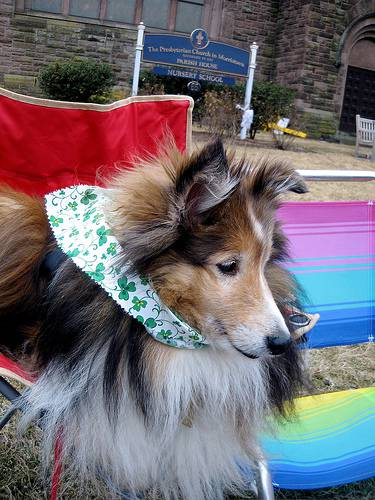

In [28]:
# Before lets convert image into Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[10])
image

In [29]:
# Find the maximum and minimum value in the image
image.max(), image.min()

(np.uint8(255), np.uint8(0))

In [30]:
# Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  66,  73],
        [ 78,  71,  78],
        [ 73,  66,  73]]], dtype=uint8)>

In [31]:
# Turn image into a tensor
red_image = tf.constant(image)[:,:,1]
red_image

<tf.Tensor: shape=(500, 375), dtype=uint8, numpy=
array([[100, 110, 102, ...,  68,  73,  67],
       [ 89, 102,  99, ...,  66,  71,  66],
       [ 72,  80,  74, ...,  64,  67,  63],
       ...,
       [ 27,  21,  17, ...,  51,  60,  57],
       [ 21,   7,   3, ...,  37,  50,  45],
       [ 15,  15,  19, ...,  42,  66,  69]], dtype=uint8)>

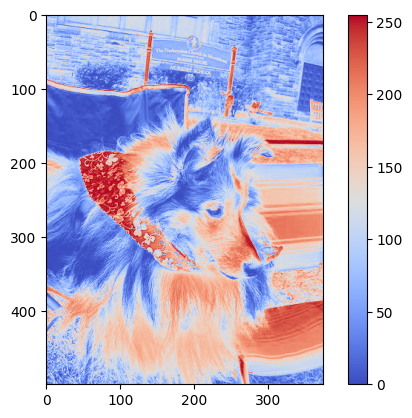

In [32]:
# Display a image with one color (green) channel.
import matplotlib.pyplot as plt
plImg = plt.imshow(red_image.numpy(), cmap="coolwarm")
plt.colorbar(plImg)
plt.show()

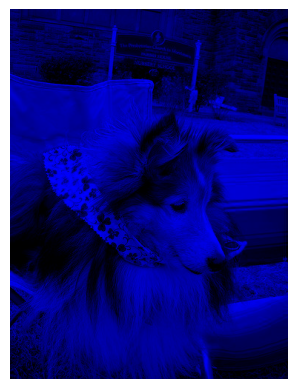

In [33]:
# Displaying image with three color channel but one of them have value (blue)
red_channel = np.zeros_like(image)
red_channel[:, :, 2] = image[:, :, 0]
plt.imshow(red_channel)
plt.axis('off')
plt.show()

In [34]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Take an image file path and turn the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

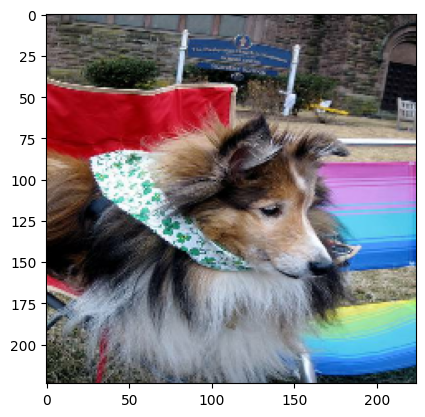

In [35]:
red_image = process_image(filenames[10])
plImg = plt.imshow(red_image.numpy())
plt.show()

## Turning our data into batches

In [36]:
# creating a function to return a tuple that is include of (image, label)
def get_image_label(image_path, label):
  """
  Take an image file path name and the associated label,
  process the image and return a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [37]:
get_image_label(x[34],tf.constant(y[34]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.09042301, 0.10218772, 0.12179556],
         [0.11473363, 0.12649834, 0.14610618],
         [0.09272581, 0.10449051, 0.12409835],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.80392164, 0.77647066, 0.7137255 ]],
 
        [[0.08168886, 0.09737513, 0.10913984],
         [0.09317888, 0.10886515, 0.12062985],
         [0.1127224 , 0.12840867, 0.14017338],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.80480576, 0.7773548 , 0.7146096 ]],
 
        [[0.1778584 , 0.19354467, 0.20530938],
         [0.10785257, 0.12353884, 0.13530354],
         [0.17694902, 0.1926353 , 0.2044    ],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.8078432 , 0.7803922 , 0.7176471 ]],
 
        ...,
 
        [[0.14830667, 0.16399294

## Create a function to turn our data into batches

In [38]:
# Define the batch size, 32 is a good start.
BATCH_SIZE = 32

# Create a function to turn data into batches.
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image(x) and labels(y) pairs.
  """
  # If data is a test dataset, we probably don't have labels.
  if test_data:
    print('creating data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filepathes(no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepath
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)
                                              ,tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images.
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [39]:
# Creating training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating data batches...
Creating data batches...


In [40]:
# Check out different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function to viewing images in a data batch